<a href="https://colab.research.google.com/github/Nburkhal/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

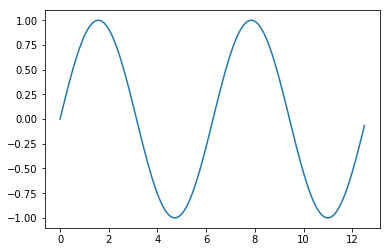

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


# Plot that passes the vertical line test
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)

plt.plot(x,y)
plt.show();

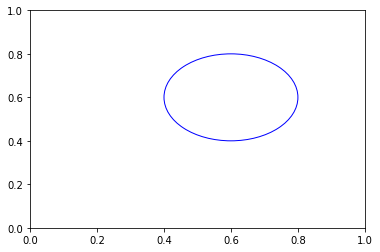

In [6]:
# Plot that does not pass the vertical line test

circle1=plt.Circle((.6,.6),.2,color='b', fill=False)
plt.gcf().gca().add_artist(circle1);

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function is a mapping of a set of data points to a singular point, not multiple outputs

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 - passes the vertical line test; for each different X domain, a specific y value is defined. The other examples produce ambiguous results - multiple y values for each x input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

M. Dimensionality of domain = 3; Dimensionality of codomain = 3:       
N. Dimensionality of domain = 4; Dimensionality of codomain = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes. You can take, for example, x = 1 in R, and map it in R2 by calling it (1, 0)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

P:

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

\begin{align}
f(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ 2 \end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ -1 \end{bmatrix}
\end{align}

\begin{align}
pT = \begin{bmatrix} 1 & 3 \\ 2 & -1 \end{bmatrix}
\end{align}


Q:

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \\x_3\end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + x_3\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\\
\end{align}

\begin{align}
f(\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}) = \begin{bmatrix} 4 \\ -1 \\ 5 \end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}
\\
f(\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix}
\end{align}


\begin{align}
qT = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
# Traditional function
def p(x, y):
  
  x_ = x + (3*y)
  y_ = (2*x) - y
  
  return (x_, y_)

def q(x, y, z):
  
  x_ = (4*x) + y + (2*z)
  y_ = -x + (2*y) + (3*z)
  z_ = (5*x) + y - (2*z)
  
  return(x_, y_, z_)

In [17]:
print(p(1, 2))
print(q(1, 2, 3))

(7, 0)
(12, 12, 1)


In [19]:
# Vector-matrix multiplication

vector1 = np.array([1, 2])
vector2 = np.array([1, 2, 3])
matrix_p = np.array([[1, 2], [3, -1]])
matrix_q = np.array([[4, -1, 5], [1, 2, 1], [2, 3, -2]])

print(np.matmul(vector1, matrix_p))
print(np.matmul(vector2, matrix_q))

[7 0]
[12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is any vector that doesn't change its orientation during a transformation (i.e. the axis of the Earth running through the north and south poles). An eigenvalue is a scalar by which the eigenvector was scaled during transformation (eigenvectors can be scaled, but cannot change orientation - like how the earth might flatten a bit if it started spinning faster; the orientation of its axis remains the same, though the length may be squished). A principle application of this concept is found in PCA (principle component analysis)

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The difficulty of finding signal amongst the noise becomes exponentially more difficult as the number of dimensions increases

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

If P is greater than or equal to N, we are at extreme risk of overfitting our model. A good rule of thumb is that N should be at least 5 times larger than P.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('fivethirtyeight')

In [21]:
data = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'

df = pd.read_csv(data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
# Define our matrix
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
target = df['species']

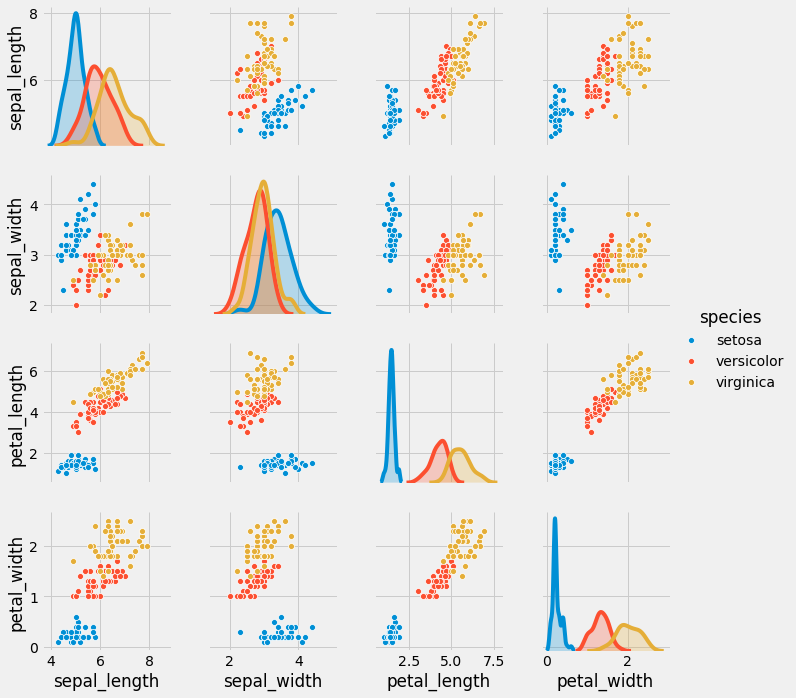

In [24]:
sns.pairplot(df, hue='species');

In [27]:
# Calculate the column means
means = np.mean(features.T, axis=1)

# Calculate column std
std_devs = np.std(features.T, axis=1)

# Standardize columns
Z = (features - np.mean(features)) / np.std(features)

# Calculate covariance matrix of centered matrix
covariance_matrix = np.cov(Z.T)

# Eigendecomposition
values, vectors = np.linalg.eig(covariance_matrix)

# Project data
projected = vectors.T.dot(features.T)
projected.T

array([[ 2.66923088e+00, -5.18088722e+00, -2.50606121e+00,
        -1.15201064e-01],
       [ 2.69643401e+00, -4.64364530e+00, -2.48287429e+00,
        -1.05532777e-01],
       [ 2.48116330e+00, -4.75218345e+00, -2.30435358e+00,
        -1.02643429e-01],
       [ 2.57151243e+00, -4.62661492e+00, -2.22827673e+00,
        -2.76660361e-01],
       [ 2.59065822e+00, -5.23621104e+00, -2.40975624e+00,
        -1.53814104e-01],
       [ 3.00809881e+00, -5.68221692e+00, -2.45652515e+00,
        -2.21893339e-01],
       [ 2.49094166e+00, -4.90871397e+00, -2.10637596e+00,
        -1.81430750e-01],
       [ 2.70145461e+00, -5.05320922e+00, -2.44407359e+00,
        -2.09102569e-01],
       [ 2.46158369e+00, -4.36493047e+00, -2.14656917e+00,
        -2.24117089e-01],
       [ 2.67166282e+00, -4.73176885e+00, -2.50796192e+00,
        -2.50416312e-01],
       [ 2.83139678e+00, -5.47980351e+00, -2.65987045e+00,
        -1.41544777e-01],
       [ 2.65510568e+00, -4.98085502e+00, -2.28578101e+00,
      

In [0]:
# Use libraries to find pc1 & pc2

# Create the PCA instance
pca = PCA(2)

# Fit on the data
pca.fit(Z)

# Transform the data
b = pca.transform(features)

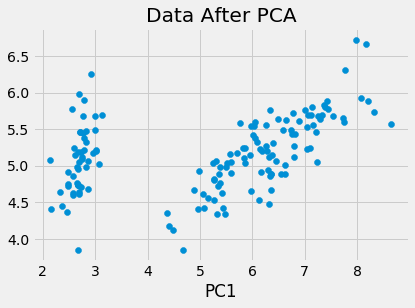

In [29]:
B = b.T
plt.scatter(B[0], B[1])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show();

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)